## Логистическая регрессия

In [299]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("seaborn")

from sklearn import decomposition
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from math import sqrt
from pandas import DataFrame

In [300]:
class LogisticRegression:
    def __init__(self, lr=0.01, n_iter=100):
        self.lr = lr
        self.n_iter = n_iter
     
    def fit(self, X, y):
        intercept = np.ones((X.shape[0], 1))
        X = np.concatenate((intercept, X), axis=1)
        self.theta = np.zeros(X.shape[1])
        
        for i in range(self.n_iter):
            z = np.dot(X, self.theta)
            h =  1 / (1 + np.exp(-z))
            gradient = np.dot(X.T, (h - y)) / len(y)
            self.theta -= self.lr * gradient
            
    def predict(self, X):
        intercept = np.ones((X.shape[0], 1))
        X = np.concatenate((intercept, X), axis=1)
        return 1 / (1 + np.exp(-(np.dot(X, self.theta))))

In [301]:
iris = load_iris()

In [302]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [303]:
iris.data.shape

(150, 4)

In [283]:
iris.target.shape

(150,)

In [284]:
iris_frame = DataFrame(iris.data)
iris_frame.columns = iris.feature_names
iris_frame['target'] = iris.target
iris_frame['name'] = iris_frame.target.apply(lambda x : iris.target_names[x])

In [285]:
iris_frame.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [286]:
iris_frame.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
name                 0
dtype: int64

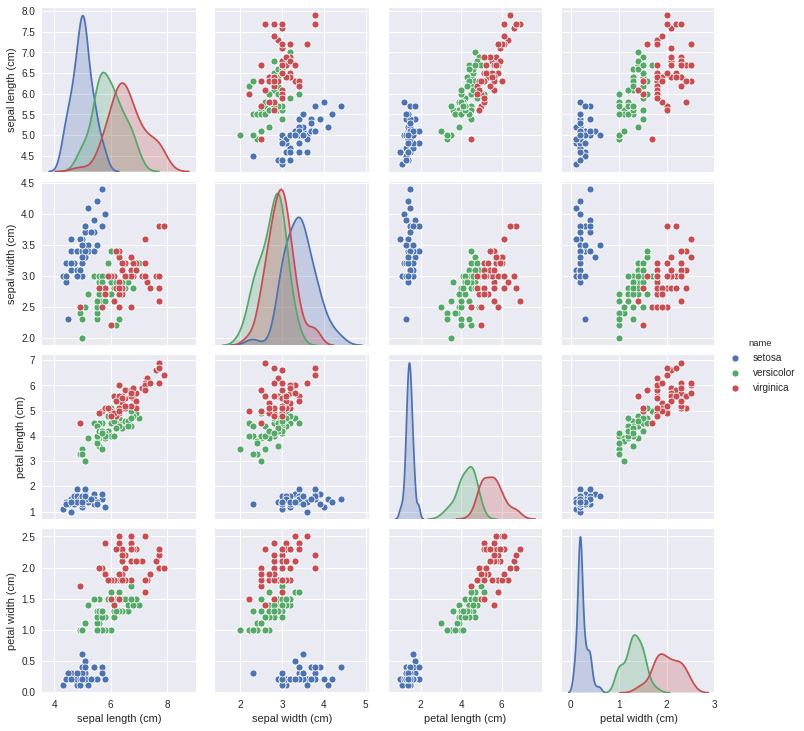

In [287]:
sns.pairplot(iris_frame[['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)','name']], hue = 'name')

In [288]:
iris_frame[['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']].corr()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.000000,-0.117570,0.871754,0.817941
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126
petal length (cm),0.871754,-0.428440,1.000000,0.962865
petal width (cm),0.817941,-0.366126,0.962865,1.000000


In [304]:
X_train, X_test, Y_train, Y_test = train_test_split(iris_frame[['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']], iris_frame['target'], test_size = 0.3, random_state = 0)
model = LogisticRegression(lr=0.01, n_iter=300)
%time model.fit(X_train, Y_train)

CPU times: user 78.4 ms, sys: 897 µs, total: 79.3 ms
Wall time: 77.3 ms


In [305]:
model.theta

array([0.17512238, 2.74327215, 0.14276489, 4.92716222, 2.06746626])

## Кластеризация методом k-средних

In [323]:
class kMeans():
    def __init__(self, k=2, max_iter=500):
        self.k = k
        self.max_iter = max_iter
        self.kmeans_centroids = []

    def euclidean_distance(self, vec_1, vec_2):
        distance = 0
        for i in range(len(vec_1)):
            distance += pow((vec_1[i] - vec_2[i]), 2)
        return np.sqrt(distance)        
        
    def fit(self, data):
        n_samples, n_features = np.shape(data)
        centroids = np.zeros((self.k, n_features))
        for i in range(self.k):
            centroid = data[np.random.choice(range(n_samples))]
            centroids[i] = centroid
        for _ in range(self.max_iter):
            n_samples = np.shape(data)[0]
            clusters = [[] for _ in range(self.k)]
            for sample_i, sample in enumerate(data):
                closest_i = None
                closest_distance = float("inf")
                for i, centroid in enumerate(centroids):
                    distance = self.euclidean_distance(sample, centroid)
                    if distance < closest_distance:
                        closest_i = i
                        closest_distance = distance
                clusters[closest_i].append(sample_i)
            prev_centroids = centroids
            n_features = np.shape(data)[1]
            centroids = np.zeros((self.k, n_features))
            for i, cluster in enumerate(clusters):
                centroid = np.mean(data[cluster], axis=0)
                centroids[i] = centroid    
            diff = centroids - prev_centroids
            if not diff.any():
                break
        self.kmeans_centroids = centroids
        return centroids

    def predict(self, data):
        n_samples = np.shape(data)[0]
        clusters = [[] for _ in range(self.k)]
        for sample_i, sample in enumerate(data):
            closest_i = None
            closest_distance = float("inf")
            for i, centroid in enumerate(centroids): 
                distance = self.euclidean_distance(sample, centroid)
                if distance < closest_distance:
                    closest_i = i
                    closest_distance = distance
            clusters[closest_i].append(sample_i)
        predicted_labels = np.zeros(np.shape(data)[0])
        for cluster_i, cluster in enumerate(clusters):
            for sample_i in cluster:
                predicted_labels[sample_i] = cluster_i            
        return predicted_labels

In [324]:
train_data = np.array(iris.data)
train_labels = np.array(iris.target)
num_features = train_data.data.shape[1]

pca = decomposition.PCA(n_components=3)
pca.fit(train_data)
train_data = pca.transform(train_data)

In [325]:
unique_labels = np.unique(train_labels)
num_classes = len(unique_labels)
clf = kMeans(k=num_classes, max_iter=1000)
centroids = clf.fit(train_data)
predicted_labels = clf.predict(train_data)

In [326]:
predicted_labels

array([2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 1.,
       1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0.,
       1., 0., 1., 0., 1., 0., 0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 1.])